Simple neural network

Goal : to use the Keras deep learning library to train our first neural network on a image dataset.

1.    Importing keras and other packages.

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import os
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

## **Storing the categories in list_categories list variable**

In [ ]:
path = 'D:\\sem6\\DeppLearning\\Concrete Crack Images for Classification'
list_categories=[]
for path in os.listdir(path):
            if 'desktop.ini' in path:
                pass
            else:
               list_categories.append(path)

In [ ]:
data = []
labels = []
imagePaths=  sorted(paths.list_images('D:\\sem6\\DeppLearning\\Concrete Crack Images for Classification'))
random.seed(SEED)
random.shuffle(imagePaths)

2.   Loading the data

In [ ]:
print("image-separation-started")
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
        # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
print("image-separation-ended")



image-separation-started
image-separation-ended


## **Normalizing the dataset**

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

3.   Creating the training and testing splits

In [ ]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [ ]:
trainX


array([[0.63529412, 0.70588235, 0.74901961, ..., 0.69411765, 0.78039216,
        0.82352941],
       [0.7254902 , 0.73333333, 0.7372549 , ..., 0.61568627, 0.62352941,
        0.63921569],
       [0.70196078, 0.69803922, 0.70588235, ..., 0.59215686, 0.59215686,
        0.59215686],
       ...,
       [0.54901961, 0.59607843, 0.60392157, ..., 0.62745098, 0.64705882,
        0.65098039],
       [0.38431373, 0.41568627, 0.41568627, ..., 0.38431373, 0.40392157,
        0.41568627],
       [0.63921569, 0.68627451, 0.70196078, ..., 0.63921569, 0.70196078,
        0.72941176]])

In [ ]:
trainY

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype='<U8')

In [ ]:
# convert the labels from integers/categories to vectors 
# (for 2-class, binary classification you should use Keras' to_categorical function instead)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = lb.transform(testY)         # transform = perform the one-hot encoding (unique class labels already found)

In [ ]:
from keras.utils.all_utils import to_categorical

trainY=to_categorical(trainY)
testY=to_categorical(testY)

#softmax,categorical_crossentropy

In [ ]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

4.   Defining the Keras model architecture

In [ ]:
model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
model.add(Dense(512, activation="sigmoid"))                         # second hidden layer has 512 nodes
model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

5.   Compiling the Keras model

In [ ]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 60
 
opt = SGD(lr=INIT_LR)  
#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=["accuracy"])

6.   Training your model on your training data

In [ ]:
print("started")
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print("done")

started
Epoch 1/60
1000/1000 [==============================] - 85s 51ms/step - loss: 0.6324 - accuracy: 0.6503 - val_loss: 0.3902 - val_accuracy: 0.8366
Epoch 2/60
1000/1000 [==============================] - 43s 43ms/step - loss: 0.3594 - accuracy: 0.8534 - val_loss: 0.2868 - val_accuracy: 0.8863
Epoch 3/60
1000/1000 [==============================] - 55s 55ms/step - loss: 0.3124 - accuracy: 0.8804 - val_loss: 0.3560 - val_accuracy: 0.8577
Epoch 4/60
1000/1000 [==============================] - 44s 44ms/step - loss: 0.2810 - accuracy: 0.8930 - val_loss: 0.2267 - val_accuracy: 0.9187
Epoch 5/60
1000/1000 [==============================] - 50s 50ms/step - loss: 0.2656 - accuracy: 0.9015 - val_loss: 0.2298 - val_accuracy: 0.9186
Epoch 6/60
1000/1000 [==============================] - 49s 49ms/step - loss: 0.2384 - accuracy: 0.9118 - val_loss: 0.2379 - val_accuracy: 0.9049
Epoch 7/60
1000/1000 [==============================] - 54s 54ms/step - loss: 0.2506 - accuracy: 0.9077 - val_loss: 

1000/1000 [==============================] - 54s 54ms/step - loss: 0.1847 - accuracy: 0.9375 - val_loss: 0.1570 - val_accuracy: 0.9471
Epoch 57/60
1000/1000 [==============================] - 54s 54ms/step - loss: 0.1696 - accuracy: 0.9431 - val_loss: 0.2055 - val_accuracy: 0.9246
Epoch 58/60
1000/1000 [==============================] - 59s 59ms/step - loss: 0.1737 - accuracy: 0.9401 - val_loss: 0.2366 - val_accuracy: 0.9202
Epoch 59/60
1000/1000 [==============================] - 54s 54ms/step - loss: 0.1715 - accuracy: 0.9434 - val_loss: 0.2300 - val_accuracy: 0.9175
Epoch 60/60
1000/1000 [==============================] - 54s 54ms/step - loss: 0.1732 - accuracy: 0.9429 - val_loss: 0.1904 - val_accuracy: 0.9355
done


7.   Making predictions using your trained Keras model

In [ ]:
print("evaluating network...")
predictions = model.predict(testX, batch_size=32)
#print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))
#print(classification_report(trainY, predictions, target_names=None))

cl=classification_report(testY.argmax(axis=1),  predictions.argmax(axis=1), target_names=["Positive", "Negative"])

evaluating network...


NameError: ignored

In [ ]:
print(cl)

              precision    recall  f1-score   support

    Positive       0.91      0.97      0.94      4022
    Negative       0.97      0.90      0.93      3978

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000



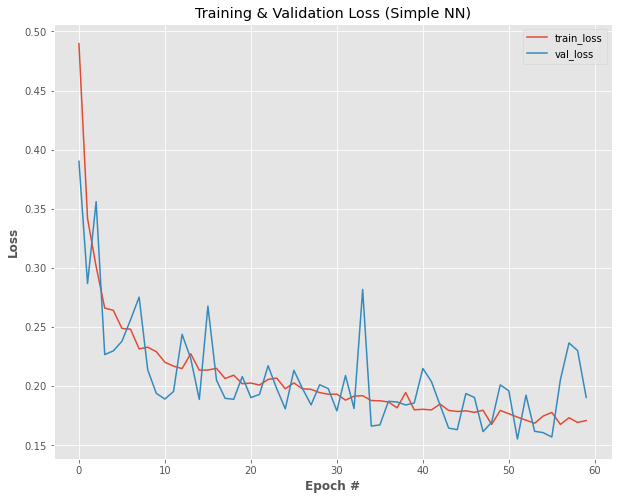

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 3,672,578
Trainable params: 3,672,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(" serializing network")
model.save('simple_NN_model.h5')
f = open('simple_NN_label_bin', "wb")
f.write(pickle.dumps(lb))
f.close()

 serializing network
